# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

## Regression Model Evaluation

In [70]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [6]:
y = data["MEDV"]
X = data.drop(columns="MEDV")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.intercept_,lr.coef_

(33.76426262435936,
 array([-1.02574583e-01,  3.77693479e-02,  3.13688118e-02,  1.81430143e+00,
        -1.73510825e+01,  4.14275636e+00, -4.40342000e-03, -1.49739844e+00,
         2.48883310e-01, -9.72126287e-03, -9.92249925e-01,  1.14575945e-02,
        -5.06846794e-01]))

In [12]:
y_pred= lr.predict(X_test)
y_pred

array([32.99272121, 17.21169579, 30.99138914, 32.9819768 , 17.97244356,
       33.6263124 , 25.05917395, 27.62236179, 28.90251618, 30.50468335,
       24.92129279, 13.99162364, 24.87391474, 39.55036555, 21.11491452,
       18.85547651, 18.28090035, 19.70078565, 33.80994244, 13.5541451 ,
       20.4438448 , 31.23574371, 19.92297632, 12.51615158, 15.57746502,
       25.14515583, 22.48538684, 28.05033538, 21.94540569, 33.21111549,
       19.42684325, 27.29630316, 13.26698547, 25.23979981, 22.90948146,
       17.85751488, 14.32888103, 20.3514745 , 24.91772873, 22.0579788 ,
       17.85551329, 24.32352342, 16.19109864, 22.73333809, 14.85687005,
       22.79406997, 18.26522659, 23.22098643, 32.53842694, 13.42654933,
       21.08382583, 23.02958657, 25.53608115, 16.04802837, 30.82150906,
        7.5784342 , 23.90007127, 22.00473215, 13.75055299, 27.04149622,
       17.57078156,  4.56570949, 26.47270421, 43.71764807, 17.82175509,
       21.48724439,  0.81436807, 19.25059033, 37.8797895 , 29.33

## 3. Calculate and print R-squared for both the training and the testing set.

In [13]:
r2_score(y_test,y_pred)

0.7281078813683466

## 4. Calculate and print mean squared error for both the training and the testing set.

In [14]:
rmse = mean_squared_error(y_test, y_pred)**0.5
rmse

4.3458027838466435

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [17]:
mean_absolute_error(y_test, y_pred)

3.0715018722494913

## Classification Model Evaluation

In [67]:
from sklearn.datasets import load_iris

iris = load_iris()

X = pd.DataFrame(iris["data"], columns=iris["feature_names"])
y = pd.DataFrame(iris["target"], columns=["class"])

iris = pd.concat([X, y], axis=1)
iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     class  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
145      2  
146      2  
147      2  
148      2  
149      2  

[150 rows x 5 columns]

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [34]:
y = iris["class"]
X = iris.drop(columns="class")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [58]:
logr=LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
y_pred

array([0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2,
       1, 1, 0, 1, 0, 1, 2, 2])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [69]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logr.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.93


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [72]:
balanced_accuracy_score(y_test, y_pred)

0.9523809523809524

## 10. Calculate and print the precision score for both the training and the testing set.

In [65]:
precision_score(y_test, y_pred, average=None)

array([1.        , 0.83333333, 1.        ])

## 11. Calculate and print the recall score for both the training and the testing set.

In [66]:
recall_score(y_test, y_pred, average=None)

array([1.        , 1.        , 0.85714286])

## 12. Calculate and print the F1 score for both the training and the testing set.

In [57]:
f1_score(y_test,y_pred, average=None)

array([1.        , 0.90909091, 0.92307692])

## 13. Generate confusion matrices for both the training and the testing set.

In [55]:
conf = confusion_matrix(y_test, y_pred)

In [56]:
conf = pd.DataFrame(conf,columns=set(y_test), index=set(y_pred))
conf

0   1   2
0  6   0   0
1  0  10   0
2  0   2  12

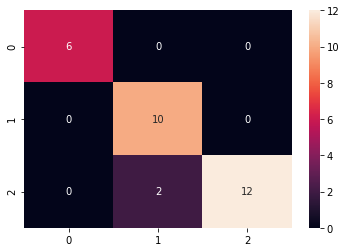

In [47]:
import seaborn as sns
sns.heatmap(conf, annot=True)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.